In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import pickle

In [7]:
file_path = r'pest.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

In [13]:
data[0:5]

,MaxT(°C),MinT(°C),RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),Pest
0,27.2,18.6,90.1,68.6,0.0,3.7,6.8,2.7,Miridbug
1,27.3,19.1,90.7,68.6,0.0,3.7,6.4,2.8,Miridbug
2,29.2,19.1,95.8,62.0,0.0,2.7,7.6,3.5,Miridbug
3,28.6,18.7,92.4,64.9,0.0,2.9,8.6,2.3,Miridbug
4,29.2,18.0,93.1,62.0,0.0,2.5,8.1,3.2,Miridbug


In [18]:
print("Dataset Shape:", data.shape)

print("\nNull Values:")
print(data.isnull().sum())

Dataset Shape: (1196, 9)

Null Values:
MaxT(°C)    0
MinT(°C)    0
RH1(%)      0
RH2(%)      0
RF(mm)      0
WS(kmph)    0
SSH(hrs)    0
EVP(mm)     0
Pest        0
dtype: int64


In [28]:
print("Unique Values :")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} ")

Unique Values :
MaxT(°C): 190 
MinT(°C): 193 
RH1(%): 192 
RH2(%): 334 
RF(mm): 234 
WS(kmph): 99 
SSH(hrs): 109 
EVP(mm): 87 
Pest: 9 


In [32]:
sns.set(style="whitegrid")

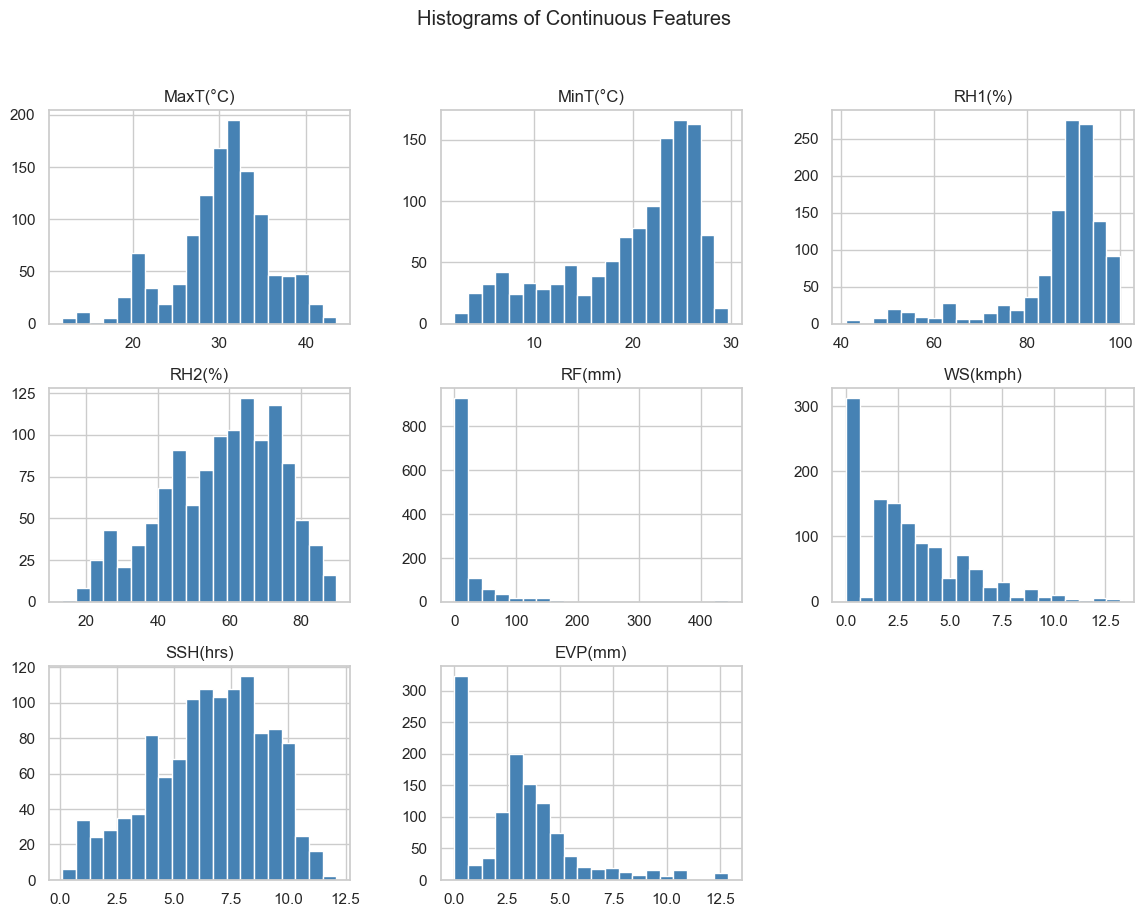

In [34]:
data.hist(bins=20, figsize=(14, 10), color='steelblue')
plt.suptitle('Histograms of Continuous Features')
plt.show()

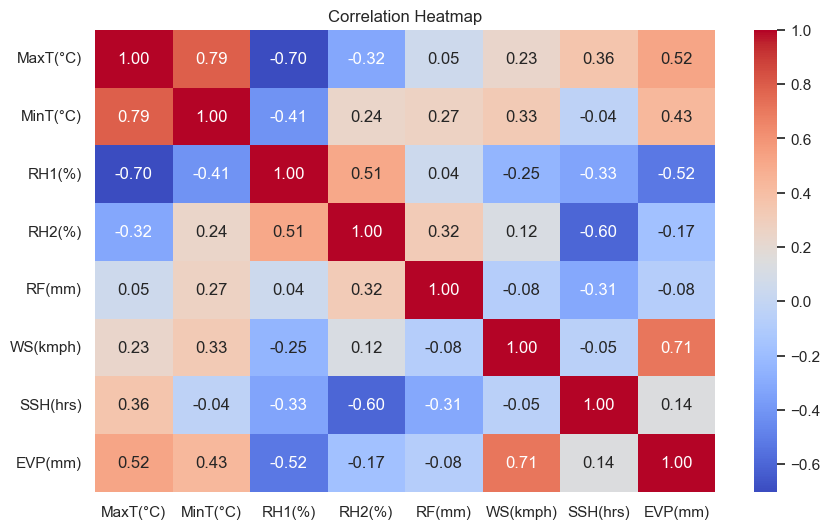

In [42]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13360\1973270318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Pest'], palette='viridis')


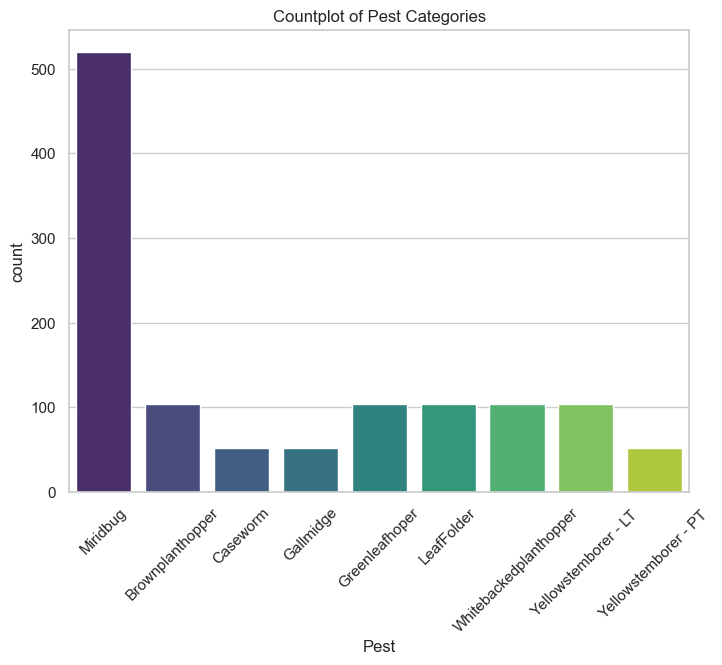

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Pest'], palette='viridis')
plt.title('Countplot of Pest Categories')
plt.xticks(rotation=45)
plt.show()

In [93]:
X = data[['MaxT(°C)', 'MinT(°C)', 'RH1(%)', 'RH2(%)', 'RF(mm)', 'WS(kmph)', 'SSH(hrs)', 'EVP(mm)']]  # Feature columns
y = data['Pest']  # Target column



In [48]:
le = LabelEncoder()

# Fit and transform the target 'Pest'
y_encoded = le.fit_transform(y)

# Display the unique categories and corresponding encoded values
print("Pest Categories and their Encoded Values:")
for pest, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{pest}: {code}")

# Display first 5 entries of the encoded target
print("\nEncoded Target (First 5 Values):", y_encoded[:5])

Pest Categories and their Encoded Values:
Brownplanthopper: 0
Caseworm: 1
Gallmidge: 2
Greenleafhoper: 3
LeafFolder: 4
Miridbug: 5
Whitebackedplanthopper: 6
Yellowstemborer - LT : 7
Yellowstemborer - PT : 8

Encoded Target (First 5 Values): [5 5 5 5 5]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

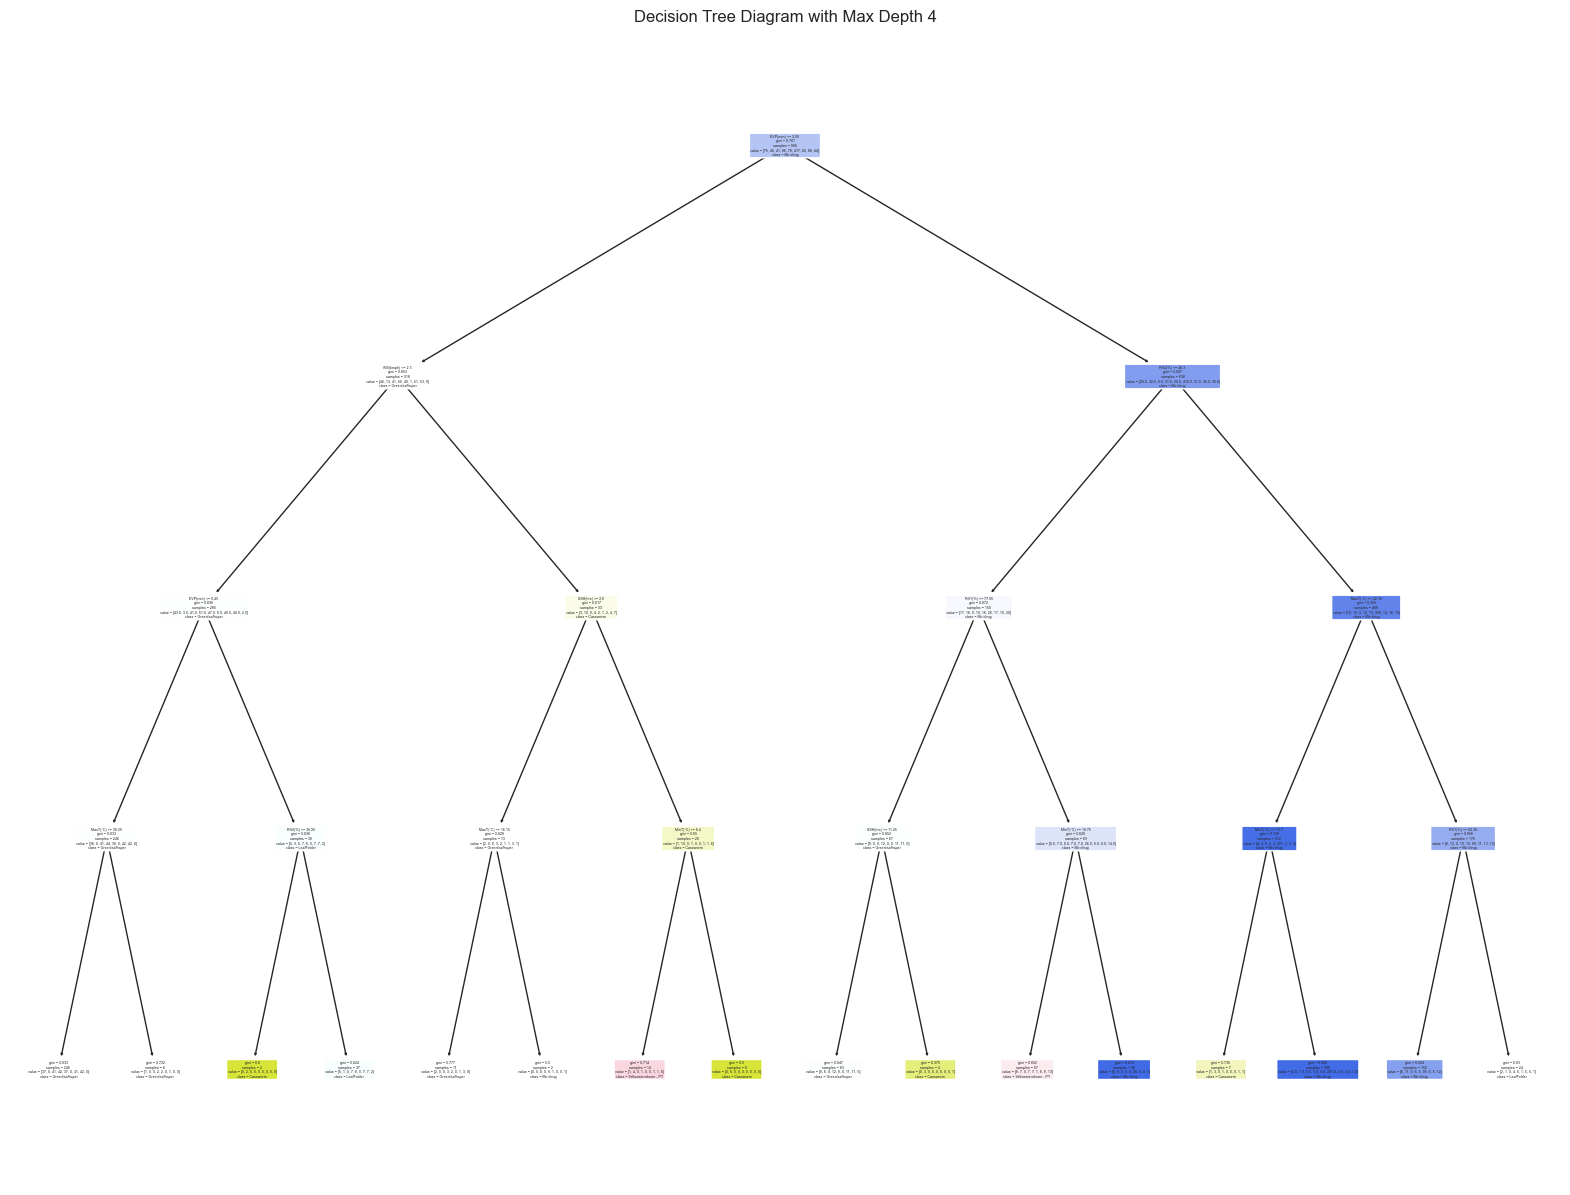

In [86]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title('Decision Tree Diagram with Max Depth 4')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [88]:
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy on Training Set: 0.5439330543933054
Accuracy on Test Set: 0.4666666666666667
Classification Report:
                         precision    recall  f1-score   support

      Brownplanthopper       0.00      0.00      0.00        29
              Caseworm       0.00      0.00      0.00         7
             Gallmidge       0.00      0.00      0.00        11
        Greenleafhoper       0.10      0.44      0.16        18
            LeafFolder       0.00      0.00      0.00        26
              Miridbug       0.83      0.98      0.90       103
Whitebackedplanthopper       0.00      0.00      0.00        22
 Yellowstemborer - LT        0.00      0.00      0.00        16
 Yellowstemborer - PT        0.14      0.38      0.20         8

              accuracy                           0.47       240
             macro avg       0.12      0.20      0.14       240
          weighted avg       0.37      0.47      0.40       240



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


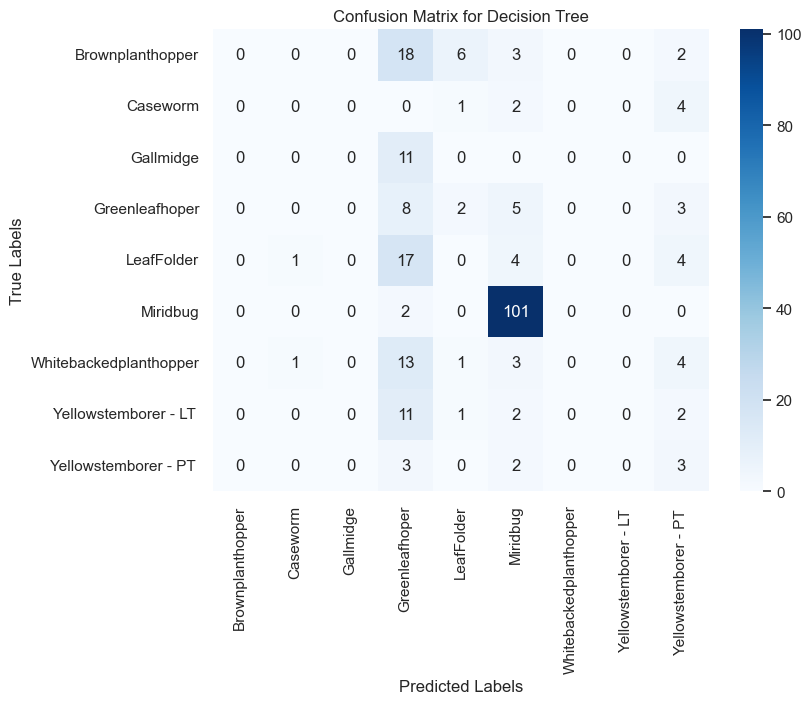

In [95]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [118]:
sample_input = np.array([[33,20.5,92.4,51,0,1.8	,5.2,2.8
]])

# Make predictions using the trained model
sample_prediction = model.predict(sample_input)

# Decode the predicted class
predicted_class = le.inverse_transform(sample_prediction)

print("Predicted Class for the Sample Input:", predicted_class[0])

Predicted Class for the Sample Input: LeafFolder


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [106]:
model_path = r'C:\Users\Admin\Documents\Trial\models\disease_prevention.pkl'
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to C:\Users\Admin\Documents\Trial\models\disease_prevention.pkl


In [116]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Example: y_train should be your label data

# Save the LabelEncoder to a file
with open('C:/Users/Admin/Documents/Trial/models/label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [114]:
with open('C:/Users/Admin/Documents/Trial/models/decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [68]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_rf = model_rf.predict(X_test)

# Make predictions on the training set
y_train_pred_rf = model_rf.predict(X_train)

# Evaluate the model
print("Accuracy on Training Set (Random Forest):", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy on Test Set (Random Forest):", accuracy_score(y_test, y_test_pred_rf))
print("Classification Report (Test Set - Random Forest):\n", classification_report(y_test, y_test_pred_rf, target_names=le.classes_))

Accuracy on Training Set (Random Forest): 0.6380753138075314
Accuracy on Test Set (Random Forest): 0.44583333333333336
Classification Report (Test Set - Random Forest):
                         precision    recall  f1-score   support

      Brownplanthopper       0.00      0.00      0.00        29
              Caseworm       0.40      0.29      0.33         7
             Gallmidge       0.00      0.00      0.00        11
        Greenleafhoper       0.00      0.00      0.00        18
            LeafFolder       0.00      0.00      0.00        26
              Miridbug       0.95      1.00      0.98       103
Whitebackedplanthopper       0.00      0.00      0.00        22
 Yellowstemborer - LT        0.00      0.00      0.00        16
 Yellowstemborer - PT        0.50      0.25      0.33         8

              accuracy                           0.45       240
             macro avg       0.21      0.17      0.18       240
          weighted avg       0.44      0.45      0.44       